<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [90]:
# librerias

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem

import pylab as plt
from scipy.stats import bernoulli, beta, stats
from bayes import *

In [4]:
# datos
dat = pd.read_csv('./data/cookie_cats.csv')
dat.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [23]:
# transformacion
dat_con = dat.loc[dat['version'] == 'gate_30']
dat_con_total = dat_con.version.count()
dat_con_r1 = dat_con.loc[dat_con['retention_1'] == True]
dat_con_true = dat_con_r1.retention_1.count()
(dat_con_total, dat_con_true)

(44700, 20034)

In [24]:
# muestreo
dat_test = dat.loc[dat['version'] == 'gate_40']
dat_test_total = dat_test.version.count()
dat_test_r1 = dat_test.loc[dat_test['retention_1'] == True]
dat_test_true = dat_test_r1.retention_1.count()
(dat_test_total, dat_test_true)

(45489, 20119)

In [25]:
# testeo para retention_1
CR_con = dat_con_true/dat_con_total
CR_test = dat_test_true/dat_test_total
f'Tasas conversion: Control: {CR_con}, Test: {CR_test}'

'Tasas conversion: Control: 0.4481879194630872, Test: 0.44228274967574577'

Para el testeo de retention_7 lo hago con las betas

In [41]:
# testeo para retention_7
dat_con_r7 = dat_con.loc[dat_con['retention_7'] == True]
dat_con_true = dat_con_r7.retention_7.count()
(dat_con_total, dat_con_true)

(44700, 8502)

In [40]:
dat_test_r7 = dat_test.loc[dat_test['retention_7'] == True]
dat_test_true = dat_test_r7.retention_7.count()
(dat_test_total, dat_test_true)

(45489, 8279)

In [42]:
a_C, b_C = 1+dat_con_true, 1+dat_con_total-dat_con_true

a_T, b_T = 1+dat_test_true, 1+dat_test_total-dat_test_true

beta_control = beta(a_C, b_C)

beta_test = beta(a_T, b_T)

beta_control.mean(), beta_test.mean()

(0.19021520289919913, 0.18201402475214878)

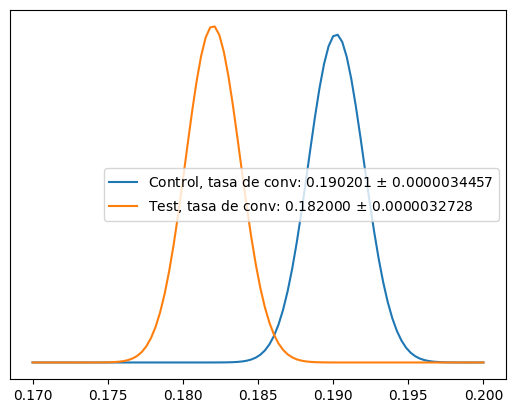

In [82]:
# conclusiones
# Explica detalladamente las conclusiones obtenidas de. tu testeo.
plot([beta_control, beta_test], ['Control', 'Test'], linf=0.17, lsup=0.20)

Por un lado tenemos que las tasas conversion son para el día 1:   

* Control: 0.4481879194630872  
* Test: 0.44228274967574577  

Por lo que al ser la tasa del control superior a la del Test no tiene el efecto buscado el cambio en la puerta.

Por otro lado, las tasas de conversion para el día 7 son:  

* Control: 0.19021520289919913  
* Test: 0.18201402475214878  

Por lo que, como a los 7 días la conversión del control es superior a la del test se sigue demostrando que el test no está teniendo el efecto deseado.